# Постановка задачи

В данной работе, решается задача рекомендации книги читателю. Для этого, была использован метод ближайших соседей (K-Nearest Neighbors, KNN) на основе характеристик книг.

Известные характеристики:
  * id книги
  * Название
  * Афтор
  * Рейтинг книги
  * Язык на котором была написана книга
  * Количество страниц
  * Дата публикации
  * и др.

In [6]:
import pandas as pd

# Чтение данных
df = pd.read_csv('/content/kaggle/books.csv', on_bad_lines='skip')
df.head()

# Удаление пробелов из названий колонок
df.columns = df.columns.str.strip()
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Основные характеристики
display(df.describe(include='all'))

# Удаление неинформативных признаков
df = df.drop(columns=['bookID', 'title', 'authors', 'isbn', 'publication_date', 'publisher'])

# Преобразование категориальных признаков в числовые
df = pd.get_dummies(df, columns=['language_code'], drop_first=True)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
count,11123.000000,11123,11123,11123.000000,11123,1.112300e+04,11123,11123.000000,1.112300e+04,11123.000000,11123,11123
unique,NaN,10348,6639,NaN,11123,NaN,27,NaN,NaN,NaN,3679,2290
top,NaN,The Iliad,Stephen King,NaN,0439785960,NaN,eng,NaN,NaN,NaN,10/1/2005,Vintage
freq,NaN,9,40,NaN,1,NaN,8908,NaN,NaN,NaN,56,318
mean,21310.856963,NaN,NaN,3.934075,NaN,9.759880e+12,NaN,336.405556,1.794285e+04,542.048099,NaN,NaN
std,13094.727252,NaN,NaN,0.350485,NaN,4.429758e+11,NaN,241.152626,1.124992e+05,2576.619589,NaN,NaN
min,1.000000,NaN,NaN,0.000000,NaN,8.987060e+09,NaN,0.000000,0.000000e+00,0.000000,NaN,NaN
25%,10277.500000,NaN,NaN,3.770000,NaN,9.780345e+12,NaN,192.000000,1.040000e+02,9.000000,NaN,NaN
50%,20287.000000,NaN,NaN,3.960000,NaN,9.780582e+12,NaN,299.000000,7.450000e+02,47.000000,NaN,NaN
75%,32104.500000,NaN,NaN,4.140000,NaN,9.780872e+12,NaN,416.000000,5.000500e+03,238.000000,NaN,NaN


In [8]:
df.shape
df.columns

Index(['average_rating', 'isbn13', 'num_pages', 'ratings_count',
       'text_reviews_count', 'language_code_ara', 'language_code_en-CA',
       'language_code_en-GB', 'language_code_en-US', 'language_code_eng',
       'language_code_enm', 'language_code_fre', 'language_code_ger',
       'language_code_gla', 'language_code_glg', 'language_code_grc',
       'language_code_ita', 'language_code_jpn', 'language_code_lat',
       'language_code_msa', 'language_code_mul', 'language_code_nl',
       'language_code_nor', 'language_code_por', 'language_code_rus',
       'language_code_spa', 'language_code_srp', 'language_code_swe',
       'language_code_tur', 'language_code_wel', 'language_code_zho'],
      dtype='object')

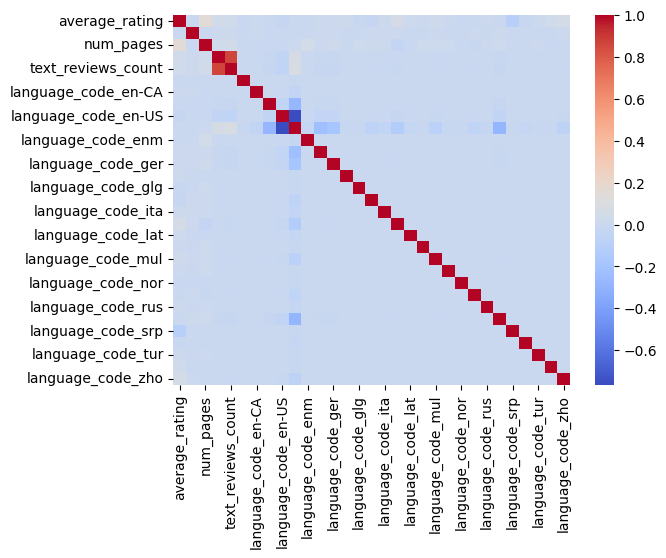

In [10]:
# Корреляционная матрица
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

In [11]:
# Проверка на наличие пропущенных значений
print(df.isnull().sum())

# Удаление строк с пропущенными значениями (если есть)
df.dropna(inplace=True)

average_rating         0
isbn13                 0
num_pages              0
ratings_count          0
text_reviews_count     0
language_code_ara      0
language_code_en-CA    0
language_code_en-GB    0
language_code_en-US    0
language_code_eng      0
language_code_enm      0
language_code_fre      0
language_code_ger      0
language_code_gla      0
language_code_glg      0
language_code_grc      0
language_code_ita      0
language_code_jpn      0
language_code_lat      0
language_code_msa      0
language_code_mul      0
language_code_nl       0
language_code_nor      0
language_code_por      0
language_code_rus      0
language_code_spa      0
language_code_srp      0
language_code_swe      0
language_code_tur      0
language_code_wel      0
language_code_zho      0
dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler

# Нормализация числовых признаков
scaler = StandardScaler()
numeric_cols = ['num_pages', 'ratings_count', 'text_reviews_count']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [13]:
from sklearn.model_selection import train_test_split

# Разделение данных
X = df.drop('average_rating', axis=1)
y = df['average_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

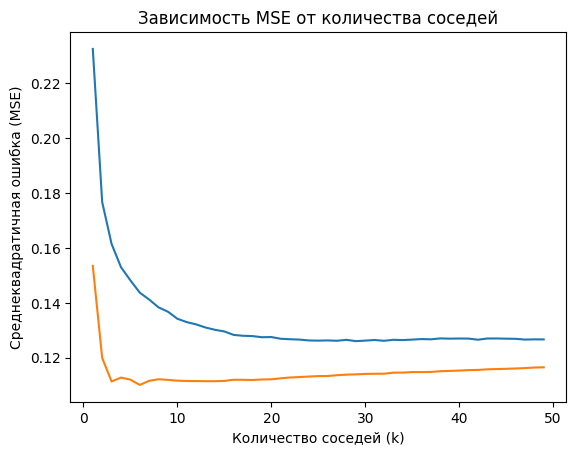

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Перебор разного количества соседей
k_values = range(1, 50)
mse_values = []
mse_values_2 = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    mse_values_2.append(mean_squared_error(y_train, knn.predict(X_train)))

# Построение графика
plt.plot(k_values, mse_values)
plt.plot(k_values, mse_values_2)
plt.xlabel('Количество соседей (k)')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.title('Зависимость MSE от количества соседей')
plt.show()

In [19]:
# Оптимальное значение k
optimal_k = k_values[mse_values.index(min(mse_values))]
print(f'Оптимальное значение k: {optimal_k}')

# Обучение модели с оптимальным k
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
print(f'Среднеквадратичная ошибка для оптимального k: {mse_optimal}')

Оптимальное значение k: 29
Среднеквадратичная ошибка для оптимального k: 0.1260568747745461


In [21]:
df_res = pd.DataFrame({'pred': y_pred_optimal, 'true': y_test})
df_res

,pred,true
8661,3.995517,3.85
483,3.893793,3.97
8401,3.902414,3.92
6380,3.937241,0.00
1844,3.769655,4.16
...,...,...
11113,4.062414,3.92
2344,3.891724,3.83
4099,3.839655,4.00
5593,3.742069,3.75


Сделали модельку при использовании алгоритма KNeighborsRegressor, получили что оптимальное количество кластеров равняется 29, при ошибке ~0.12